In [1]:
from PIL import Image

image = Image.open(r"imgs/input_image_vermeer.png")

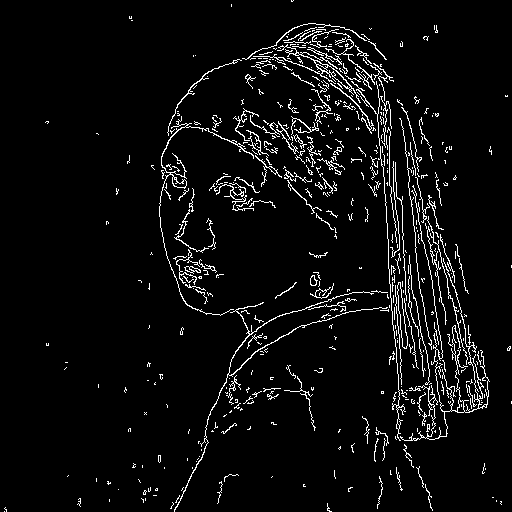

In [2]:
import cv2
from PIL import Image
import numpy as np

image = np.array(image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)
canny_image

In [3]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

controlnet = ControlNetModel.from_pretrained(
    r"/root/autodl-fs/pre_trained_models/lllyasviel-sd-controlnet-canny"
)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "/root/autodl-fs/pre_trained_models/runwayml-stable-diffusion-v1-5/runwayml-stable-diffusion-v1-5",
    controlnet=controlnet,
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
from diffusers import UniPCMultistepScheduler

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

In [5]:
pipe.enable_model_cpu_offload()

In [6]:
pipe.enable_xformers_memory_efficient_attention()

In [7]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

In [8]:
import torch

prompt = ", best quality, extremely detailed"
prompt = [
    t + prompt for t in ["Sandra Oh", "Kim Kardashian", "rihanna", "taylor swift"]
]  # 分别为: 吴珊卓、金·卡戴珊、蕾哈娜、泰勒·斯威夫特
generator = [torch.Generator(device="cpu").manual_seed(2) for i in range(len(prompt))]

  0%|          | 0/20 [00:00<?, ?it/s]

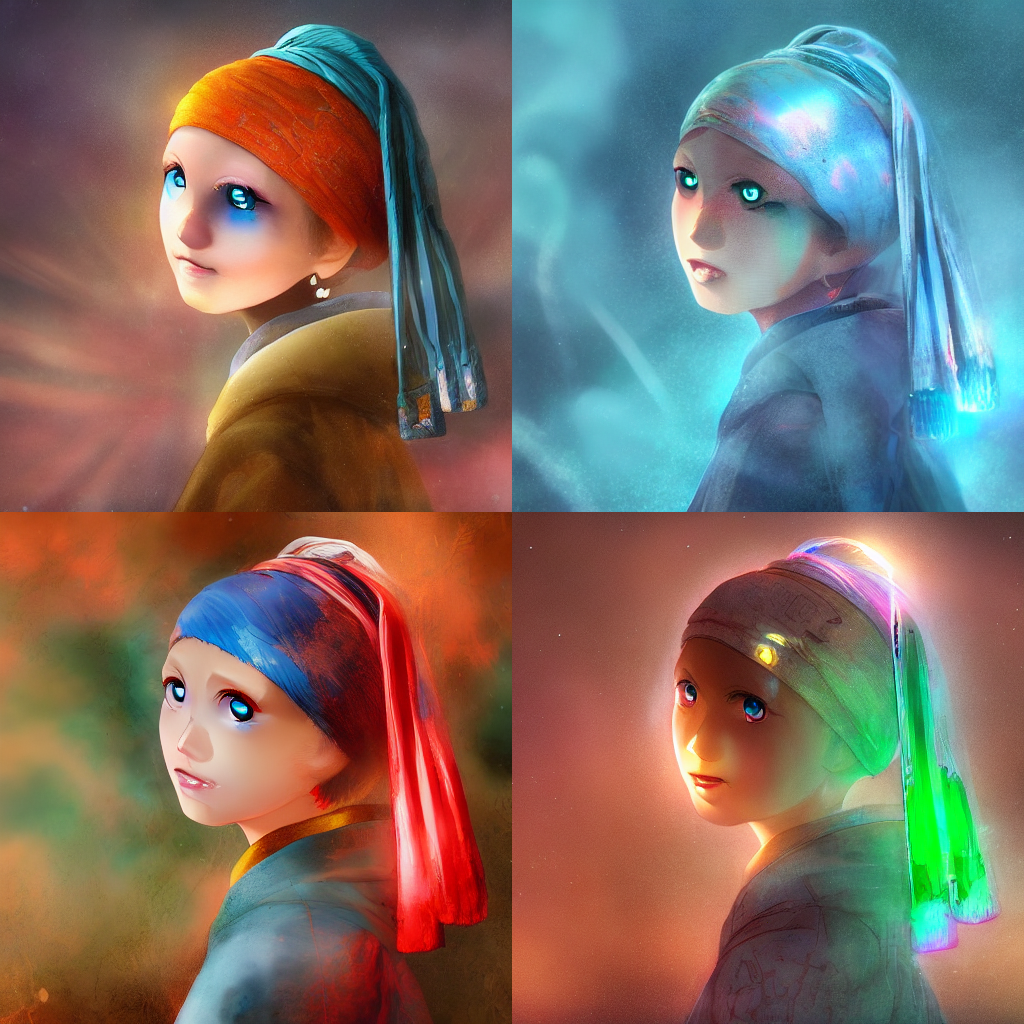

In [13]:
prompt = ["boy, cyperpunk, Anime, smile, best quality, extremely detailed"] * 4

output = pipe(
    prompt,
    canny_image,
    negative_prompt=["monochrome, lowres, bad anatomy, worst quality, low quality"] * 4,
    num_inference_steps=20,
    # generator=generator,
)

image_grid(output.images, 2, 2)

In [19]:
# model_id = "sd-dreambooth-library/mr-potato-head"
model_dir = r"/root/autodl-fs/pre_trained_models/sd-dreambooth-library-mr-potato-head"
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    model_dir,
    controlnet=controlnet,
    # torch_dtype=torch.float16,
)
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.enable_xformers_memory_efficient_attention()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

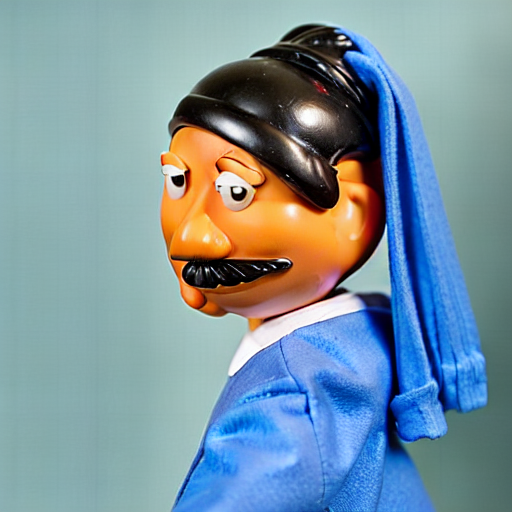

In [16]:
generator = torch.manual_seed(2)
prompt = "a photo of sks mr potato head, best quality, extremely detailed"
output = pipe(
    prompt,
    canny_image,
    negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality",
    num_inference_steps=20,
    generator=generator,
)
output.images[0]

In [1]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "/root/autodl-fs/pre_trained_models/runwayml-stable-diffusion-v1-5/runwayml-stable-diffusion-v1-5"
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

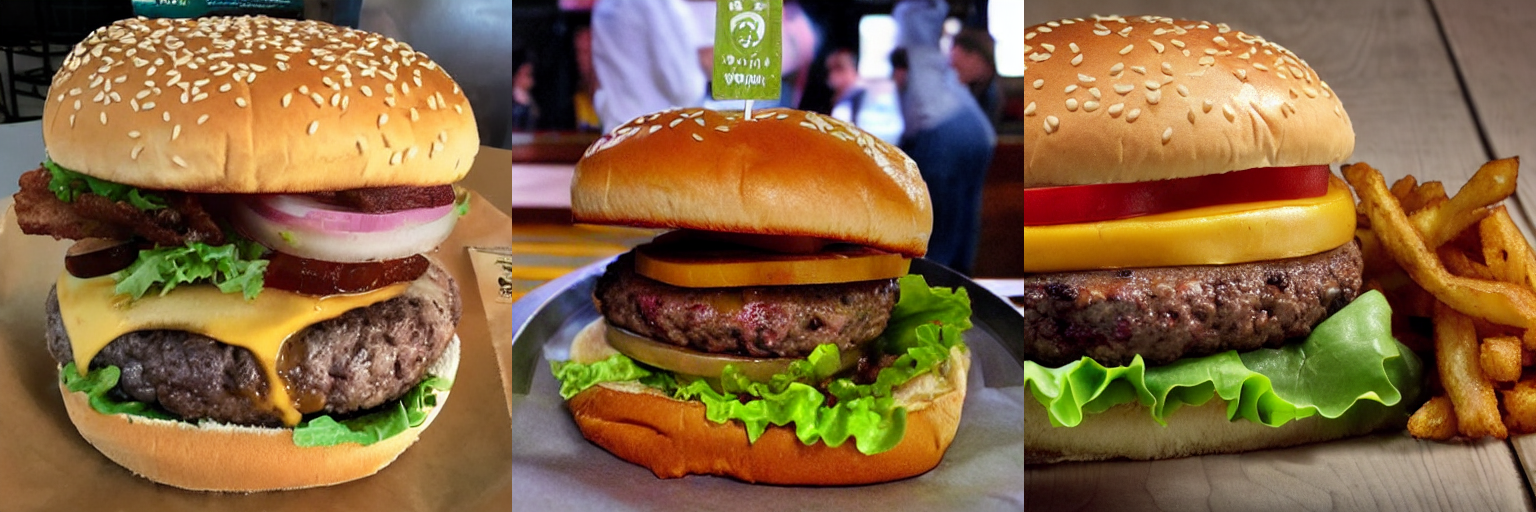

In [12]:
pipe.to("cuda")
from PIL import Image


def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid


num_images = 3
prompt = ["burger, low quality"] * num_images

images = pipe(prompt).images

grid = image_grid(images, rows=1, cols=3)
grid
# you can save the grid with
# grid.save(f"astronaut_rides_horse.png")